## Exploration: Multi-Head Attention

In [1]:
import sys
sys.path.append("..")

import torch
import matplotlib.pyplot as plt
from src.mha import MultiHeadAttention, EnhancedMultiHeadAttention

### Attention Weight Visualization

In [2]:
def visualize_attention(attention_weights):
    """Visualize attention weights across different heads.
    Args:
        attention_weights: tensor of shape [batch_size, num_heads, seq_len, seq_len]
    """
    num_heads = attention_weights.shape[1]
    attn = attention_weights[0].detach().cpu().numpy()
    
    cols = min(4, num_heads)
    rows = (num_heads + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(12, 3*rows))
    axes = axes.flatten() if num_heads > 1 else [axes]
    
    for head_idx in range(num_heads):
        ax = axes[head_idx]
        im = ax.imshow(attn[head_idx])
        ax.set_title(f'Head {head_idx}')
        ax.set_xlabel('Key')
        ax.set_ylabel('Query')
        plt.colorbar(im, ax=ax)
    
    fig.suptitle("Attention Weights")
    plt.tight_layout()
    return fig

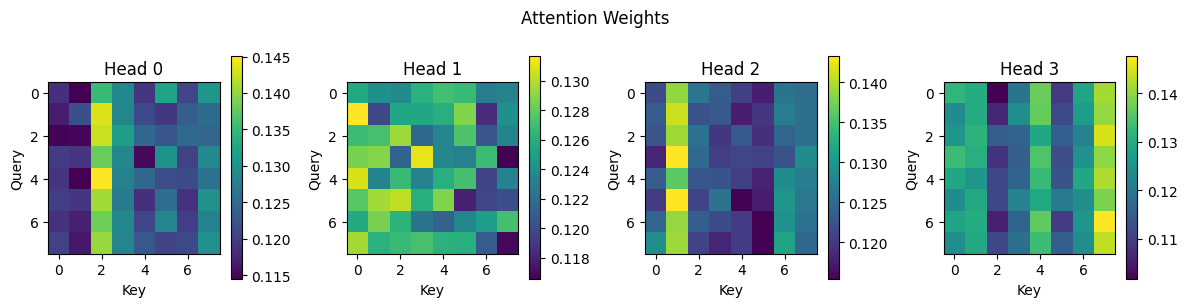

In [3]:
batch_size = 1
seq_length = 8
d_model = 64
num_heads = 4

x = torch.rand(batch_size, seq_length, d_model)
mha = MultiHeadAttention(d_model, num_heads)

output, attn_weights = mha(x)

visualize_attention(attn_weights)
plt.show()

### Attention Weight Visualization With Dropout / LayerNorm & Causal Masking

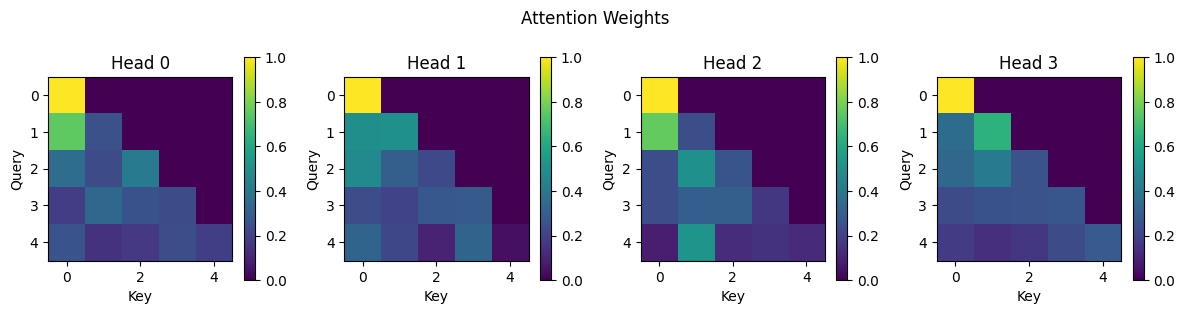

In [4]:
batch_size = 1
seq_length = 5
d_model = 16
num_heads = 4

x = torch.rand(batch_size, seq_length, d_model)
mha = EnhancedMultiHeadAttention(d_model, num_heads, dropout=0.1, use_causal_mask=True)

output, attn_weights = mha(x)
visualize_attention(attn_weights)
plt.show()